In [4]:
# import used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
# Import CarSharing into pandas dataframe
df = pd.read_csv('CarSharing.csv')
df.head

<bound method NDFrame.head of         id            timestamp  season holiday workingday   
0        1  2017-01-01 00:00:00  spring      No         No  \
1        2  2017-01-01 01:00:00  spring      No         No   
2        3  2017-01-01 02:00:00  spring      No         No   
3        4  2017-01-01 03:00:00  spring      No         No   
4        5  2017-01-01 04:00:00  spring      No         No   
...    ...                  ...     ...     ...        ...   
8703  8704  2018-08-05 00:00:00    fall      No         No   
8704  8705  2018-08-05 01:00:00    fall      No         No   
8705  8706  2018-08-05 02:00:00    fall      No         No   
8706  8707  2018-08-05 03:00:00    fall      No         No   
8707  8708  2018-08-05 04:00:00    fall      No         No   

                     weather   temp  temp_feel  humidity  windspeed    demand  
0     Clear or partly cloudy   9.84     14.395      81.0     0.0000  2.772589  
1     Clear or partly cloudy   9.02     13.635      80.0     0.00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8708 non-null   int64  
 1   timestamp   8708 non-null   object 
 2   season      8708 non-null   object 
 3   holiday     8708 non-null   object 
 4   workingday  8708 non-null   object 
 5   weather     8708 non-null   object 
 6   temp        7506 non-null   float64
 7   temp_feel   8606 non-null   float64
 8   humidity    8669 non-null   float64
 9   windspeed   8508 non-null   float64
 10  demand      8708 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 748.5+ KB


In [7]:
#drop na
df.dropna(inplace=True)
#drop duplicates
df.drop_duplicates(inplace=True)
# change timestamp to date type
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7185 entries, 0 to 8707
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          7185 non-null   int64         
 1   timestamp   7185 non-null   datetime64[ns]
 2   season      7185 non-null   object        
 3   holiday     7185 non-null   object        
 4   workingday  7185 non-null   object        
 5   weather     7185 non-null   object        
 6   temp        7185 non-null   float64       
 7   temp_feel   7185 non-null   float64       
 8   humidity    7185 non-null   float64       
 9   windspeed   7185 non-null   float64       
 10  demand      7185 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(4)
memory usage: 673.6+ KB


In [8]:
#Encoding the categorical variables

le = LabelEncoder()
df['season'] = le.fit_transform(df['season'])
df['holiday']=le.fit_transform(df['holiday'])
df['workingday'] = le.fit_transform(df['workingday'])
df['weather'] = le.fit_transform(df['weather'])

df.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,1,0,0,0,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,1,0,0,0,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,1,0,0,0,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,1,0,0,0,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,1,0,0,0,9.84,14.395,75.0,0.0,0.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7185 entries, 0 to 8707
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          7185 non-null   int64         
 1   timestamp   7185 non-null   datetime64[ns]
 2   season      7185 non-null   int64         
 3   holiday     7185 non-null   int64         
 4   workingday  7185 non-null   int64         
 5   weather     7185 non-null   int64         
 6   temp        7185 non-null   float64       
 7   temp_feel   7185 non-null   float64       
 8   humidity    7185 non-null   float64       
 9   windspeed   7185 non-null   float64       
 10  demand      7185 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(5)
memory usage: 673.6 KB


In [ ]:
# oe = OneHotEncoder(sparse=False)
# df['workingday'] = oe.fit_transform(df['workingday'].values.reshape(-1,1))
# df['holiday'] = oe.fit_transform(df['holiday'].values.reshape(-1,1))
# df['weather_code'] = oe.fit_transform(df['weather_code'].values.reshape(-1,1))

### Question 2

In [10]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

### Linear Regression

In [11]:
# temp and demand
x = df['temp'].values.reshape(-1, 1)
y = df['demand'].values.reshape(-1, 1)
f_value, p_value = f_regression(x,y)
print("f_value: ", f_value)
print("p_value: ", p_value)

f_value:  [1323.5489844]
p_value:  [3.89590721e-266]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# humidity and demand
x = df['humidity'].values.reshape(-1, 1)
y = df['demand'].values.reshape(-1, 1)
f_value, p_value = f_regression(x,y)
print("f_value: ", f_value)
print("p_value: ", p_value)

f_value:  [903.52539842]
p_value:  [4.41226666e-187]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# windspeed and demand
x = df['windspeed'].values.reshape(-1, 1)
y = df['demand'].values.reshape(-1, 1)
f_value, p_value = f_regression(x,y)
print("f_value: ", f_value)
print("p_value: ", p_value)

f_value:  [115.67371842]
p_value:  [8.95316236e-27]


/home/codespace/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Z test?




In [14]:
# workingday and demand
import scipy.stats as stats
group0 = df.loc[df['workingday'] == 0, 'demand']
group1 = df.loc[df['workingday'] == 1, 'demand']

print(np.var(group0, ddof=1), np.var(group1, ddof=1))

def f_test(group0, group1):
    f = np.var(group0, ddof=1) / np.var(group1, ddof=1)
    nun = group0.size - 1
    dun = group1.size - 1
    p_value = 1 - stats.f.cdf(f, nun, dun)
    return f, p_value

f, p = f_test(group0, group1)
print('F-test: F =', f, 'p-value =', p)

t, p = stats.ttest_ind(a=group0, b=group1, equal_var=True)
print('t-test: t =', t, 'p-value =', p)

1.9503834865663117 2.3841593576597084
F-test: F = 0.818059195707794 p-value = 0.999999981086743
t-test: t = 1.771137494767247 p-value = 0.07658023698783106


### Question 3

In [ ]:
# df = pd.read_csv('D:\Programming\OmoT\CarSharing.csv')
# df['timestamp'] = pd.to_datetime(df['timestamp'])
# df = df.dropna()

# demand_weekly_average = demand.resample('W').mean()
# temp_weekly_average = temp.resample('W').mean()

# temp_weekly_average.head()

# demand_weekly_average.dropna(inplace = True)
# temp_weekly_average.dropna(inplace = True)

# model = ARIMA(demand_weekly_average, order=(5,1,0))
# model_fit = model.fit()
# # summary of fit model
# print(model_fit.summary())
# # line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

# X = demand_weekly_average.values
# size = int(len(X) * 0.70)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# # walk-forward validation
# for t in range(len(test)):
#     model = ARIMA(history, order=(0,0,1))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

predicted=22.372055, expected=24.215448
predicted=22.644530, expected=21.652432
predicted=19.924292, expected=16.933000
predicted=17.866905, expected=19.147612
predicted=21.962944, expected=22.670226
predicted=21.460333, expected=21.719487
predicted=21.051759, expected=15.799794
predicted=15.554438, expected=15.268759
predicted=20.243948, expected=17.143309
predicted=17.414818, expected=12.657097
predicted=15.602791, expected=14.221314
predicted=18.752492, expected=12.282797
predicted=13.598668, expected=10.660000
Test RMSE: 3.136063


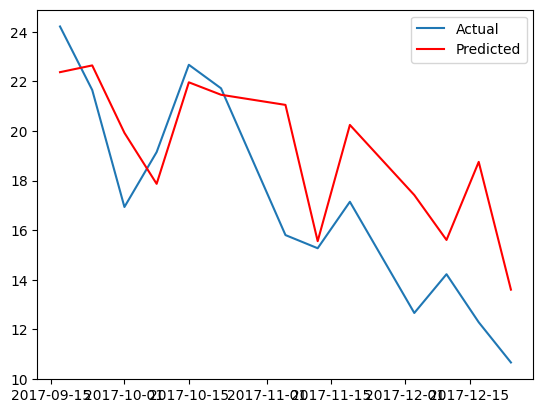

In [15]:
timestamp = df[df['timestamp'].dt.year == 2017]['timestamp']
temp = df[df['timestamp'].dt.year == 2017]['temp']
temp.index = timestamp
temp_weekly_average = temp.resample('W').mean()
temp_weekly_average.dropna(inplace = True)

# Split training and test sets
train_size = int(len(temp_weekly_average) * 0.7)
train, test = temp_weekly_average.iloc[:train_size], temp_weekly_average.iloc[train_size:]

history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(0,0,1))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))

# # Fit ARIMA model to training data
# model = ARIMA(train, order=(5, 1, 0))
# model.fit = model.fit()

# # Predict
# pred = model.fit.forecast(steps=len(test))[0]

# Calculate RMSE
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %3f' % rmse)

# Plot actual and predicted values
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, predictions, color='red', label='Predicted')
plt.legend()
plt.show()

### Question 4

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [17]:
#  Filter the dataset to include only the data for the year 2017
df_2017 = df[df['timestamp'].dt.year == 2017]

# Split the dataset into training and test sets
X = df_2017[['temp', 'humidity', 'windspeed', 'season']]
y = df_2017['weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_cols = ['temp', 'humidity', 'windspeed']
cat_cols = ['season']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train_final = pd.concat([X_train[cat_cols], X_train[num_cols]], axis=1)
X_test_final = pd.concat([X_test[cat_cols], X_test[num_cols]], axis=1)

#### Using Random Forest Classifier

In [18]:
rfc = RandomForestClassifier()
rfc.fit(X_train_final, y_train)
y_pred = rfc.predict(X_test_final)
rfc_accuracy = accuracy_score(y_test, y_pred)

#### Using Support Vector MAchines

In [19]:
svc = SVC()
svc.fit(X_train_final, y_train)
y_pred = svc.predict(X_test_final)
svc_accuracy = accuracy_score(y_test, y_pred)

#### Using Gradient Boosting Classifier


In [20]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train_final, y_train)
y_pred = gbc.predict(X_test_final)
gbc_accuracy = accuracy_score(y_test, y_pred)

#### Models Accuracy

In [21]:
print("Random Forest Classifier Accuracy: ", rfc_accuracy)
print("Support Vector Machines Accuracy: ", svc_accuracy)
print("Gradient Boosting Classifier Accuracy: ", gbc_accuracy)

Random Forest Classifier Accuracy:  0.7085201793721974
Support Vector Machines Accuracy:  0.6965620328849028
Gradient Boosting Classifier Accuracy:  0.7152466367713004


### Question 5

In [22]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

In [23]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4457 entries, 0 to 5421
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   temp       4457 non-null   float64
 1   humidity   4457 non-null   float64
 2   windspeed  4457 non-null   float64
 3   season     4457 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 174.1 KB


In [24]:
X = df_2017[['temp', 'humidity', 'windspeed', 'season']]
y = df_2017['demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

num_cols = ['temp', 'humidity', 'windspeed']
cat_cols = ['season']

scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train_final = pd.concat([X_train[cat_cols], X_train[num_cols]], axis=1)
X_test_final = pd.concat([X_test[cat_cols], X_test[num_cols]], axis=1)

In [25]:
mlp = MLPRegressor(max_iter=1000)

parameters = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (40,), (50,), (60,)],
    'activation': ['relu', 'tanh'],
}

In [26]:
clf = GridSearchCV(mlp, parameters, cv=5, verbose=3)
clf.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,);, score=0.264 total time=   1.1s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,);, score=0.304 total time=   1.4s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,);, score=0.306 total time=   1.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,);, score=0.299 total time=   1.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,);, score=0.300 total time=   1.2s
[CV 1/5] END activation=relu, hidden_layer_sizes=(20,);, score=0.270 total time=   1.6s
[CV 2/5] END activation=relu, hidden_layer_sizes=(20,);, score=0.306 total time=   1.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(20,);, score=0.315 total time=   1.3s
[CV 4/5] END activation=relu, hidden_layer_sizes=(20,);, score=0.311 total time=   1.4s
[CV 5/5] END activation=relu, hidden_layer_sizes=(20,);, score=0.290 total time=   1.6s
[CV 1/5] END activation=relu, hidden_layer_sizes=(30,);, sc

GridSearchCV(cv=5, estimator=MLPRegressor(max_iter=1000),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(10,), (20,), (30,), (40,),
                                                (50,), (60,)]},
             verbose=3)

In [27]:
# Train and evaluate the deep neural network model with the best hyperparameters
mlp_best = MLPRegressor(max_iter=1000, **clf.best_params_)
mlp_best.fit(X_train, y_train)
y_pred_mlp = mlp_best.predict(X_test)
mlp_mse = mean_squared_error(y_test, y_pred_mlp)

In [28]:
# Train and evaluate the random forest regressor model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, y_pred_rf)

In [29]:
print("Minimum Mean Squared Error (Deep Neural Network): ", mlp_mse)
print("Minimum Mean Squared Error (Random Forest Regressor): ", rf_mse)

Minimum Mean Squared Error (Deep Neural Network):  1.5131918675348621
Minimum Mean Squared Error (Random Forest Regressor):  1.6721732764962365


The model with the lower mean squared error is working better.

### Question 6

In [30]:
from sklearn.cluster import KMeans

In [31]:
X = df_2017[['humidity']]

#### Use Elbow Method to find the appropriate number of clusters

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/codespace/.loc

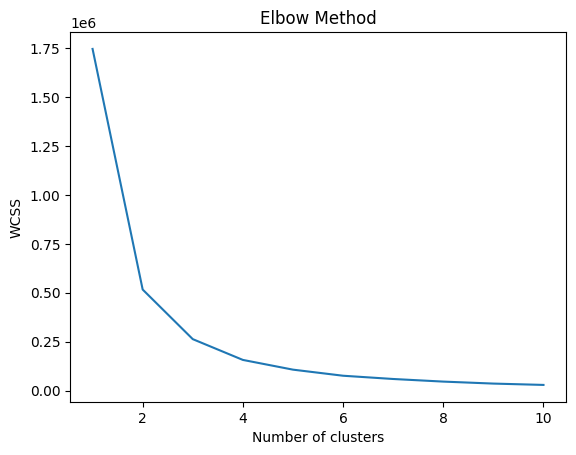

Bad pipe message: %s [b'\x00\xfe\x0bS\xda\xcev+\xd3\xadW\xc3D', b'\xd6J\xc0 &\xed\xbc\xe9\xc9g\xd0\x97\xd9\xcb\xc5\xb3*\xbc\xbar\x88>)', b'\xba\xbd\x93\xa1Vq\x9d;\x1d\xeeh\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08']
Bad pipe message: %s [b'\n\x08\x0b\x08\x04\x08\x05\x08']
Bad pipe message: %s [b'\x05\t\xb3W\x9c\x84ah-\tGm\xb3L\xc1_FS \xec\xad\xb5\x0f\xf8\xc0\x88$\xfd\xc3\xf8\xb7\x00#\xd7\xa2\xfd\xaf\xcdZ\xd10\xdd\xb7\xd1g\xa3\x93\xce\xc9\t\x15\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00', b'\x00\t127.0.0.1']
Bad pipe message: %s [b'\xca R\x14\xd6&\xe6\x02\x8b\xfd\xf8\xfd\\\x9b7\xd9K\xac\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0

In [32]:
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

As shown in the graph above, the elbow point is 3. Therefore, the appropriate number of clusters to use is 3.